In [1]:
import fc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# Fitting a model with nuisance parameters

Not all models will have only two parameters, so here we show an example with extra parameters. Note that the chi2 and fc fitting will fit the first two parameters and nuisance fit any extras. This means you may have to wrap your function. In the following example, our model will fit for a and b but will nuisance fit c

$$
f(x)=a\ln{(b x)} + c x^2
$$

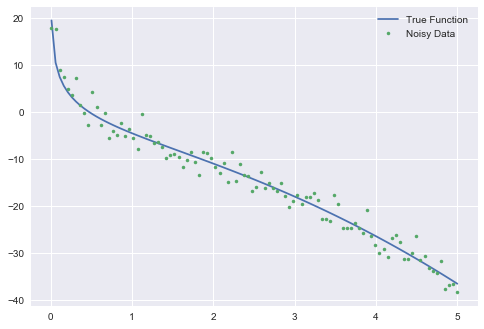

In [2]:
def model(x, a, b, c):
    return a * np.log(b * x) + c * x**2

# Generate pure data
n = 100
x = np.linspace(0.01, 5, n)
true_params = (-5, 2, -1)
pure = model(x, *true_params)
# err = 0.05 * np.sqrt(np.abs(pure))
err = 1
noise = err * np.random.normal(0, 2, n)
data = pure + noise
# data = pure + err


#Plot
plt.plot(x, pure, label='True Function')
plt.plot(x, data, '.', label='Noisy Data')
plt.legend()

## Chi2 Fitting
Again, we will perform a chi2 fit to begin with, and notice the output of the nuisance parameters

In [3]:
res = fc.fit(model, x, data, (-10, 0), (1, 5))
ext = (1, 5, -10, 0)

[-5.7894736842105265, 1.8421052631578947, -0.93314197052977566]


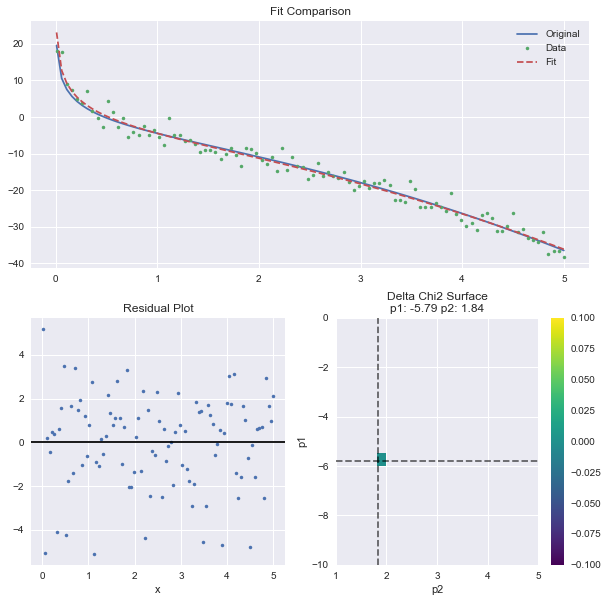

In [4]:
print(res.params)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Fit Comparison')
plt.plot(x, pure, label='Original')
plt.plot(x, data, '.', label='Data')
plt.plot(x, res.best_fit, '--', label='Fit')
plt.legend()

plt.subplot(2,2,3)
plt.title('Residual Plot')
plt.xlabel('x')
plt.plot(x, res.residuals, '.')
plt.axhline(0, color='k')

plt.subplot(2,2,4)
plt.title('Delta Chi2 Surface\np1: {:.2f} p2: {:.2f}'.format(*res.params))
plt.ylabel('p1')
plt.xlabel('p2')
surf = np.ma.masked_greater(res.dchi2_space, 11.83)
im = plt.imshow(surf, cmap='viridis', extent=ext, aspect='auto', origin='lower')
plt.contour(res.dchi2_space, [0, 2.3, 6.18, 11.83], colors='k', alpha=0.6, extent=ext)
plt.axhline(res.params[0], c='k', ls='--', alpha=0.6)
plt.axvline(res.params[1], c='k', ls='--', alpha=0.6)
plt.colorbar(im)

From here, we tune the grid parameters until we have a much clearer $\Delta\chi^2$ surface

In [26]:
res = fc.fit(model, x, data, (-5.54, -5.52), (1.866, 1.87))
ext = (1.866, 1.87, -5.54, -5.52)

[-5.5284210526315789, 1.8676842105263158, -0.96071025891613226]


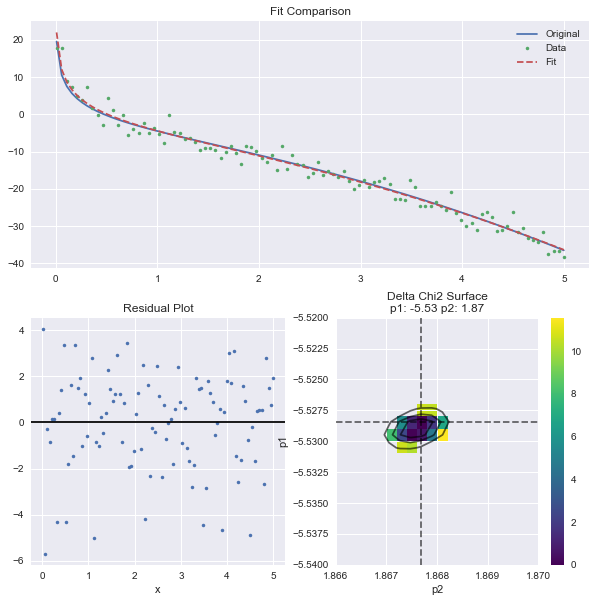

In [27]:
print(res.params)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Fit Comparison')
plt.plot(x, pure, label='Original')
plt.plot(x, data, '.', label='Data')
plt.plot(x, res.best_fit, '--', label='Fit')
plt.legend()

plt.subplot(2,2,3)
plt.title('Residual Plot')
plt.xlabel('x')
plt.plot(x, res.residuals, '.')
plt.axhline(0, color='k')

plt.subplot(2,2,4)
plt.title('Delta Chi2 Surface\np1: {:.2f} p2: {:.2f}'.format(*res.params))
plt.ylabel('p1')
plt.xlabel('p2')
surf = np.ma.masked_greater(res.dchi2_space, 11.83)
im = plt.imshow(surf, cmap='viridis', extent=ext, aspect='auto', origin='lower')
plt.contour(res.dchi2_space, [0, 2.3, 6.18, 11.83], colors='k', alpha=0.6, extent=ext)
plt.axhline(res.params[0], c='k', ls='--', alpha=0.6)
plt.axvline(res.params[1], c='k', ls='--', alpha=0.6)
plt.colorbar(im)

## Feldmen-Cousins fitting
Now that our surface is well defined, we run the fc fitting method. Note that this method takes a significant amount of time.

In [28]:
dchi2 = res.fc(n_exp=20, verbose=True)

Time elapsed 2.9375699259811654s


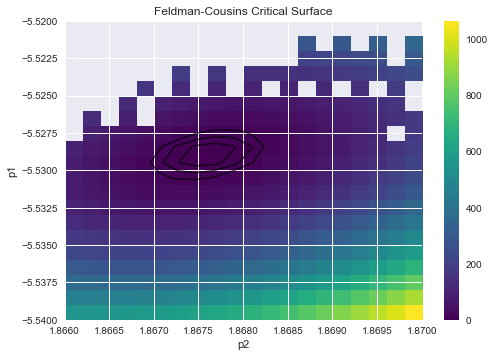

In [29]:
#mask original delta chi2 surface so that any values greater than the 95th percentile are excluded
final = res.get_surf(95)

plt.title('Feldman-Cousins Critical Surface')
im = plt.imshow(final, cmap='viridis', extent=ext, aspect='auto', origin='lower', interpolation='nearest')
plt.contour(res.dchi2_space, [0, 2.3, 6.8, 11.83], alpha=0.6, colors='k', extent=ext)
plt.ylabel('p1')
plt.xlabel('p2')
plt.colorbar(im)

In [9]:
res.nuis_params[0,1]

array([-0.99928384])